In [1]:
import tensorflow as tf


import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.17.1


[[-7.]
 [-4.]
 [-1.]
 [ 2.]
 [ 5.]
 [ 8.]
 [11.]
 [14.]]
(1,)


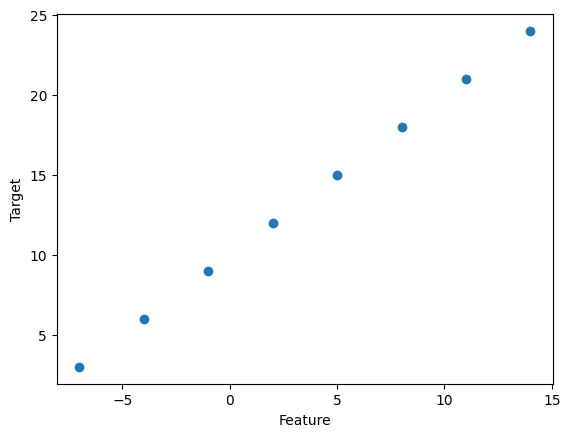

In [2]:


# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]).reshape(-1,1)
# beacuse keras expect 2d array where each arrayh is one data point with number of features
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
print(X)
print(X[0].shape)
# Visualize it
plt.xlabel("Feature")
plt.ylabel("Target")
plt.scatter(X, y);


In [3]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
print(X)
print(y)

[[-7.]
 [-4.]
 [-1.]
 [ 2.]
 [ 5.]
 [ 8.]
 [11.]
 [14.]]
[ 3.  6.  9. 12. 15. 18. 21. 24.]


In [5]:
input_shape=X[0].shape

output_shape =y[0].shape
print("Since both are scalars")
print("Input shape:",input_shape)
print("Output Shape:", output_shape)

print()
print(X[0])
print(y[0])

Since both are scalars
Input shape: (1,)
Output Shape: ()

[-7.]
3.0


In [6]:
# Turn our numpy arrays into tensors

X=tf.constant(X)
y=tf.constant(y)
X=tf.cast(X ,dtype=tf.float32)
y=tf.cast(y ,dtype=tf.float32)
X ,y,X[0].shape

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 TensorShape([1]))

## STEPS IN REGRESSION
1. Create a Model
2. Compile a model (that is loss function ,optimizer ,and evaluation metrics )
3. Fitting a Model


In [7]:
tf.random.set_seed(42)

#1. Create a model using sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)) ,#shape of each input feature
    tf.keras.layers.Dense(50 ,activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss=tf.keras.losses.mae , optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])

#3. Fit the model

history =model.fit(X ,y ,epochs=200)



Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 15.1497 - mae: 15.1497
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 14.5547 - mae: 14.5547
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 13.9666 - mae: 13.9666
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 13.3868 - mae: 13.3868
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.8132 - mae: 12.8132
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 12.2448 - mae: 12.2448
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 11.7204 - mae: 11.7204
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 11.3424 - mae: 11.3424
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 10.9803 - mae: 10.9803
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.6206 - mae: 10.6206
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 10.2555 - mae: 10.2555
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 9.8837 - mae: 9.8837
Epoch 13/200
1/1 ━━━━━━━

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

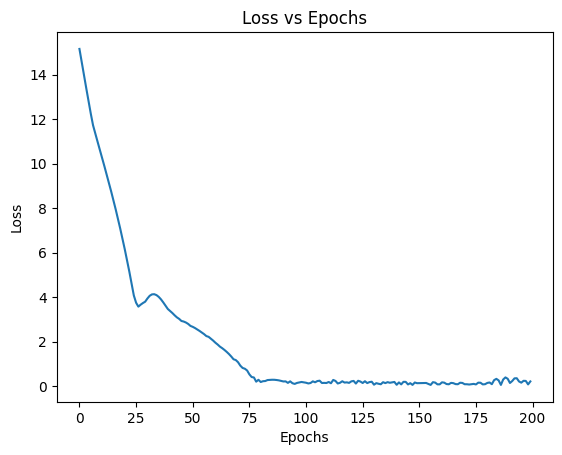

In [9]:
import matplotlib.pyplot as plt


plt.plot(history.history["loss"])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [10]:
tp=tf.constant([17,])
# tp.shape
# X
print(y)
model.predict(X)

tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[ 3.2056696],
       [ 6.0268803],
       [ 9.153348 ],
       [12.174214 ],
       [15.199587 ],
       [18.292067 ],
       [21.384544 ],
       [24.477024 ]], dtype=float32)

In [11]:
print(model.predict(tp))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[27.607203]]


## What can we do to increase accuracy ?
 1. learning rate
 2. change the optimization function
 3. Adding layers
 4. Adding epochs
 5. chnage activation fucntion
 6. Fit on more data
 7. ....... and many more

In [12]:
#What can we do to increase accuracy ?
# 1. learning rate
# 2. change the optimization function
# 3. Adding layers
# 4. Adding epochs
# 5. chnage activation fucntion
# 6. Fit on more data
# ....... and many more

## Evaluation
1. Training set - 70-80 %
2. Validation set - 10-15%
3. Test set-10-15%

In [13]:
#creating dataset myself
X_num=np.arange(50)

X=tf.constant(X_num)
X=tf.reshape(X ,(50,1))

X.shape

y=np.arange(20,70)
y=tf.constant(y)


print("Input shape" ,X.shape)
print("Output shape" ,y.shape)

X_train = X[:40]
X_test = X[40:]

y_train= y[:40]
y_test=y[40:]


print("----------------TRAINING--------------")
print("Traning input shape",X_train.shape)
print("Traning output shape",y_train.shape)

print()
print("----------------TESTING--------------")
print("Testing input shape",X_test.shape)
print("Testing output shape",y_test.shape)


Input shape (50, 1)
Output shape (50,)
----------------TRAINING--------------
Traning input shape (40, 1)
Traning output shape (40,)

----------------TESTING--------------
Testing input shape (10, 1)
Testing output shape (10,)


In [14]:
tf.random.set_seed(42)

# step1-> Create a model
model2= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(20 ,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the Model
model2.compile(loss=tf.keras.losses.mae , optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])

# Fit the Model
history =model2.fit(X_train ,y_train ,epochs=250)


Epoch 1/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 41.2564 - mae: 41.2564 
Epoch 2/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 39.5855 - mae: 39.5855 
Epoch 3/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 37.9151 - mae: 37.9151 
Epoch 4/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 36.2436 - mae: 36.2436 
Epoch 5/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.5683 - mae: 34.5683 
Epoch 6/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32.9015 - mae: 32.9015 
Epoch 7/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31.2730 - mae: 31.2730 
Epoch 8/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.6090 - mae: 29.6090 
Epoch 9/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.9199 - mae: 27.9199 
Epoch 10/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.2213 - mae: 26.2213 
Epoch 11/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.4506 - mae: 24.4506 
Epoch 12/250
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.6005 - mae: 22.6005 
Epoch 13/250
2/2 ━━━━━━━

## EVALUATING OUR MODEL ON TESTING DATA

In [15]:
y_pred = model.predict(X_test )
y_pred=tf.constant(y_pred)

print("Actual vs Predictions For test data points")
for i in range(len(y_test)):
  print(y_test[i].numpy()," ",y_pred[i][0].numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Actual vs Predictions For test data points
60   53.850338
61   55.02397
62   56.197605
63   57.387802
64   58.580364
65   59.772915
66   60.965473
67   62.15803
68   63.35059
69   64.543144


plt.plot(histo

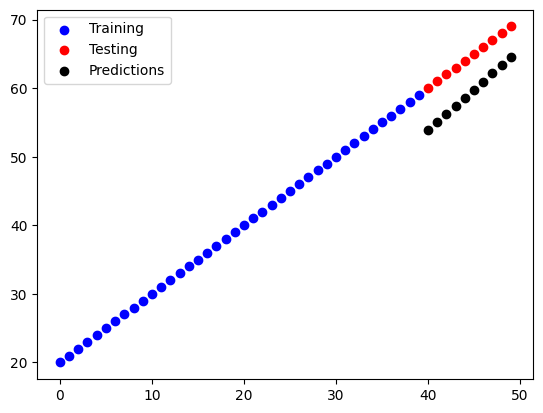

In [21]:
def plot(X_train ,y_train ,X_test ,y_test , y_pred):
  plt.scatter(X_train ,y_train ,color="blue" ,label = "Training")
  plt.scatter(X_test ,y_test ,color="red" ,label = "Testing")
  plt.scatter(X_test ,y_pred ,color="black" ,label ="Predictions")
  plt.legend()
  plt.show()

plot(X_train ,y_train ,X_test ,y_test , y_pred)


## Depending on the problem , there may be different metrics
 In regression ,two main are
 1. MAE
 2. MSE

In [17]:
model2.evaluate(X_test ,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.4428 - mae: 0.4428


[0.44281309843063354, 0.44281309843063354]

### MAE

In [18]:
print("TEST VALUES ARE",y_test)
print("PREDICTED VALUES ARE",y_pred)
y_test =tf.cast(y_test ,dtype=tf.float32)

print(y_test.dtype)
def find_mae(y_test ,y_pred):
    predictions = tf.squeeze(y_pred)
    difference = tf.abs((predictions-y_test));

    mae = tf.reduce_mean(difference)
    print("Mean absolute error is:->",)
    return mae

print(find_mae(y_test ,y_pred).numpy())

TEST VALUES ARE tf.Tensor([60 61 62 63 64 65 66 67 68 69], shape=(10,), dtype=int64)
PREDICTED VALUES ARE tf.Tensor(
[[53.850338]
 [55.02397 ]
 [56.197605]
 [57.387802]
 [58.580364]
 [59.772915]
 [60.965473]
 [62.15803 ]
 [63.35059 ]
 [64.543144]], shape=(10, 1), dtype=float32)
<dtype: 'float32'>
Mean absolute error is:->
5.3169765


### MSE

In [43]:
print(y_test.dtype)
print(y_pred.dtype)
def find_mae(y_test ,y_pred):
    predictions = tf.squeeze(y_pred)
    difference = tf.abs((predictions-y_test));

    mae = tf.reduce_mean(difference)
    return mae
print(find_mae(y_test, y_pred).numpy())

<dtype: 'float32'>
<dtype: 'float32'>
5.3169765


In [45]:
import tensorflow as tf

def find_mse(y_test, y_pred):
    predictions = tf.squeeze(y_pred)
    difference = tf.square(predictions - y_test)
    mse = tf.reduce_mean(difference)


    return mse


print(find_mse(y_test, y_pred).numpy())


28.566238


## Build a model -> **fit i**t -> **tuke it**-> **evaluate it**

1. Get more data
2. Mkae model larger
3. Train for longer
4. Learning rate tweek
5. activation tweek ,and optimaization function tweek

 and go on and on and on and on .. . . . . .

In [ ]:

# MODEL1 = 1 layer only and 100 epochs
# MODLE2


## MODEL1


In [29]:

#step1.
model_1= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

model_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
#step2.
model_1.compile(loss=tf.keras.losses.mae , optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

#step3.
history =model_1.fit(X_train ,y_train ,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 18.0623 - mae: 18.0623  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.5323 - mae: 10.5323 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.4884 - mae: 8.4884 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.4902 - mae: 8.4902
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.5145 - mae: 8.5145
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.5118 - mae: 8.5118 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.5090 - mae: 8.5090
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.5063 - mae: 8.5063
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5035 - mae: 8.5035 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5008 - mae: 8.5008 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4980 - mae: 8.4980 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4953 - mae: 8.4953 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7m

In [31]:
# Mkae and plot predictions for model 1
y_preds_1= model_1.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[70.515114]
 [72.257164]
 [73.999214]
 [75.741264]
 [77.483315]
 [79.225365]
 [80.967415]
 [82.709465]
 [84.451515]
 [86.193565]]


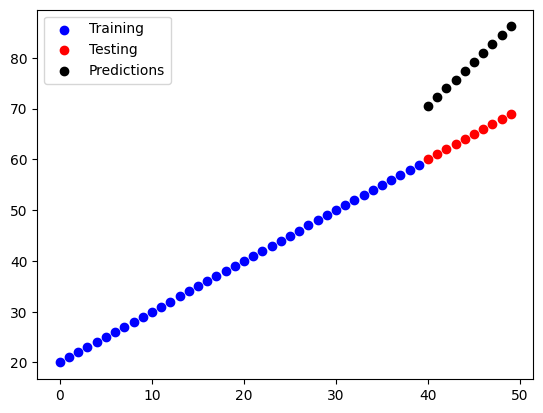

In [33]:
plot(X_train ,y_train ,X_test ,y_test ,y_preds_1)

In [47]:
# Calculate evaluation metrics
mae_1= find_mae(y_test , y_preds_1)
mse_1= find_mse(y_test ,y_preds_1)
mae_1.numpy() ,mse_1.numpy()

(13.85434, 196.4855)

## MODEL2

In [63]:

#step1.
model_2= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(10,activation='linear' ),
    tf.keras.layers.Dense(1),
])

model_2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Compile the Model
model_2.compile(loss=tf.keras.losses.mae , optimizer=tf.keras.optimizers.SGD(), metrics=["mse"])

# Fit the Model
history =model_2.fit(X_train ,y_train ,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.2782 - mse: 1900.4994  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.2008 - mse: 194.2380 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.8193 - mse: 160.6573 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5250 - mse: 107.4291 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.1747 - mse: 173.8488 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.5492 - mse: 128.3512 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11.9161 - mse: 168.1895
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 9.4816 - mse: 126.8315 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.7696 - mse: 164.5845 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.4683 - mse: 126.2679 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.7157 - mse: 162.6589
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.6888 - mse: 130.5598
Epoch 13/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


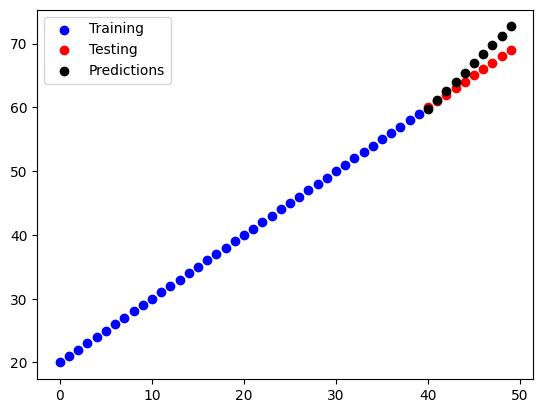

In [66]:
y_preds_2= model_2.predict(X_test)

plot(X_train ,y_train ,X_test ,y_test ,y_preds_2)

In [68]:

#calcu;ate evalutation ,matrix

mae_2 = find_mae(y_test ,y_preds_2)
mse_2= find_mse(y_test ,y_preds_2)
mae_2 ,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.7445996>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.4602575>)

## MODEL **3**

For 500 epochs else same as 2

In [69]:

#step1.
model_3= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(10,activation='linear' ),
    tf.keras.layers.Dense(1),
])

model_3.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Compile the Model
model_3.compile(loss=tf.keras.losses.mae , optimizer=tf.keras.optimizers.SGD(), metrics=["mse"])

# Fit the Model
history =model_3.fit(X_train ,y_train ,epochs=500)



Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 61.0661 - mse: 4361.7656
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 35.8125 - mse: 1392.0604  
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.5186 - mse: 199.3089 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.7037 - mse: 163.5581 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.4764 - mse: 126.6688 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.6973 - mse: 162.4403 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7220 - mse: 131.2111 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.6860 - mse: 148.2434 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.8230 - mse: 113.8590
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7570 - mse: 131.0355 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.7495 - mse: 147.5740 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8745 - mse: 115.0915 
Epoch 13/500
2/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


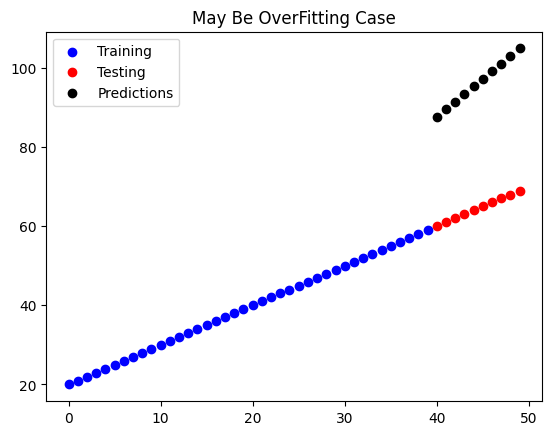

In [73]:
# plot some predictions
y_preds_3 = model_3.predict(X_test)
plt.title("May Be OverFitting Case")
plot(X_train ,y_train ,X_test ,y_test ,y_preds_3)

In [75]:
mae_3 =find_mae(y_test ,y_preds_3)
mse_3 =find_mse(y_test ,y_preds_3)

print(mae_3 ,mse_3)

tf.Tensor(31.77478, shape=(), dtype=float32) tf.Tensor(1016.6012, shape=(), dtype=float32)


# Comparing the results of the above 3 mofels

In [79]:
# Lets compare our model's result using panda's DataFrame
import pandas as pd
model_results=[["model_1" ,mae_1.numpy() ,mse_1.numpy()],["model_2" ,mae_2.numpy() ,mse_2.numpy()],["model_3" ,mae_3.numpy() ,mse_3.numpy()]]

all_results=pd.DataFrame(model_results ,columns=["MODEL" ,"Mae" ,"Mse"])

all_results

,MODEL,Mae,Mse
0,model_1,13.85434,196.485504
1,model_2,1.74460,4.460258
2,model_3,31.77478,1016.601196


In [80]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 20)                  │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63 (256.00 B)

 Trainable params: 61 (244.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# TRACKING YOUR EXPERIMENT

One really good habit is to track the reuslts of experiment.
How can we do that ? By running of lots of experimeny ,but then it can be very tedious and time consuming and so luckily
As we build more model, we will use

1. **Tensor Board**

2. **Weights & Biases**

# Saving Our Models

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

The SavedModel format (default).
The HDF5 format.
The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call

### HDF5 FORMAT (SAVING)

In [98]:
### saving our models allows us to use outside of jupyter colab for example to use it in web app or mobile app

model_2.save('savedModel/RegressionModel.h5')

### LOADING THE SAVED MODEL

In [99]:
# LOADING THE SAVED MODEL
new_model = tf.keras.models.load_model('savedModel/RegressionModel.h5')

In [101]:
new_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


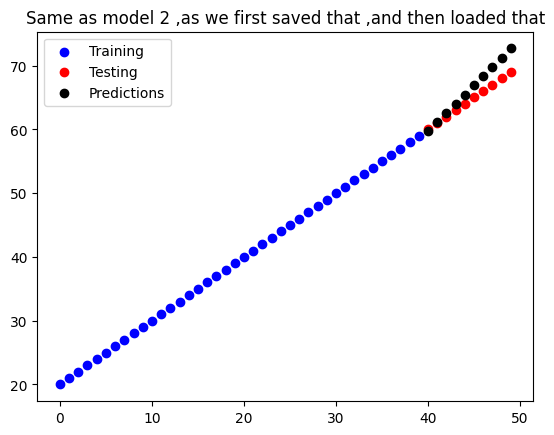

In [103]:
y_preds_from_loaded = new_model.predict(X_test)
plt.title("Same as model 2 ,as we first saved that ,and then loaded that")
plot(X_train ,y_train ,X_test ,y_test ,y_preds_from_loaded)

In [106]:
mae_loaded = find_mae(y_test ,y_preds_from_loaded)
mse_loaded = find_mse(y_test ,y_preds_from_loaded)

print(mae_loaded)
print(mse_loaded)

tf.Tensor(1.7445996, shape=(), dtype=float32)
tf.Tensor(4.4602575, shape=(), dtype=float32)


In [110]:
model_2_preds=model_2.predict(X_test)
loaded_model_preds=new_model.predict(X_test)

print(model_2_preds== loaded_model_preds)
print("This means that predictions made by original model_2 and after saviong and loading it ,the model remains the same ")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]
This means that predictions made by original model_2 and after saviong and loading it ,the model remains the same 


# Save and Download Files From Google Collab
1. Right Click and download

2. Use Code

3. Save it to google drive by connecting google drive and copying it there , see 2nd code cell below

In [116]:
#Downloading from google collab
# METHOD2
from google.colab import files

files.download("/content/savedModel/RegressionModel.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
#METHOD3

# save file from google collab To drive

# copy from_file_path to_file_path
!cp /content/savedModel/RegressionModel.h5 /content/drive/MyDrive/savedModel

In [120]:
!ls /content/drive/MyDrive/savedModel

RegressionModel.h5
